# demo
This notebook demonstrates a walkthrough of the various datasets included in this lab.

Specifically, this notebook entertains a line of inquiry, starting with a target image, then speculates as to what flight(s) may have given rise to the observed contrail. The line of inquiry finishes with observational & predicted cross-references (cross-references being an inquiry as to whether or not the contrail observed in the image was similarly observed via satellite and/or predicted to have formed via the CoCip model forecast).


## target image
First, let us pick a target image, and pull in the field-of-view and metadata associated with that image.

> 🖼️ target: `4xTdYYQZmj38MsRwWEH3`

Premature end of JPEG file


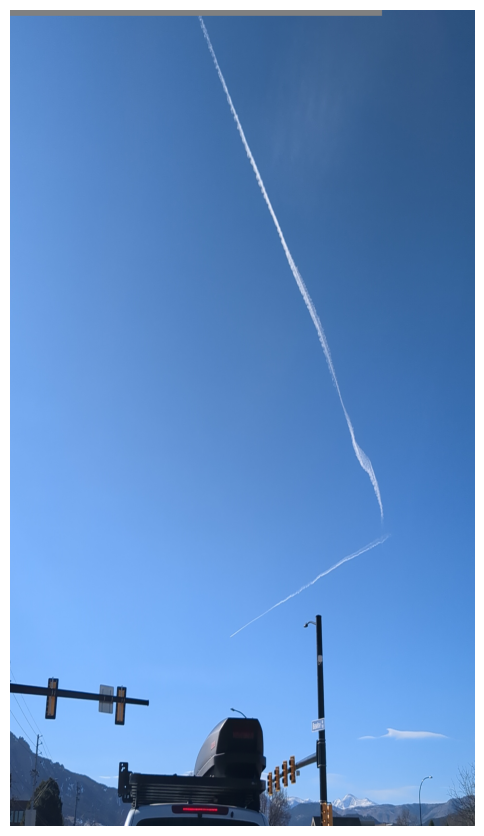

In [1]:
from google.cloud import storage
import tempfile
import matplotlib.pyplot as plt
import cv2 as cv

GCS_BUCKET = "2024-06-contrails-workshop"
PHOTO_ID = "4xTdYYQZmj38MsRwWEH3"
PHOTO_BLOB = f"observerapp_hackathon/images/{PHOTO_ID}"

gcs_client = storage.Client()
gcs_bucket = gcs_client.get_bucket(GCS_BUCKET)

with tempfile.NamedTemporaryFile() as tmp:
    blob = gcs_bucket.blob(PHOTO_BLOB)
    blob.download_to_file(tmp)
    fig, ax = plt.subplots(1,figsize=(6,10.6))
    img_color = cv.imread(tmp.name)
    ax.imshow(img_color[...,::-1],aspect='auto')
    ax.set_axis_off()

Initial observations of the image suggest that the contrails were formed by two aircraft, the lower contrail perhaps being actively generated at the time of the photograph (hard to say if the bottom contrail has an aircraft actively in the frame).
Both contrails appear to be of short lifespan, thus we suspect they were formed within a reasonably short time-delta from when the timestamp of the photo.

In [12]:
from google.cloud import bigquery
import pandas as pd

IMAGE_QUERY = """SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon, meta_tb.latitude AS img_lat, meta_tb.longitude AS img_lon
                 FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                 INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                 ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id"""
param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
    ]
)

bq_client = bigquery.Client()

image_query = bq_client.query(query=IMAGE_QUERY, job_config=param_cfg)
resp_rows = image_query.result()
image_df = resp_rows.to_dataframe()
display(image_df)


,id,timestamp,flight_level,fov_polygon,img_lat,img_lon
0,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,260,"POLYGON((-105.443966 40.050173, -105.579936 40...",40.000098,-105.23219
1,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,270,"POLYGON((-105.4541785 40.0525715, -105.596708 ...",40.000098,-105.23219
2,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,280,"POLYGON((-105.464392 40.054969, -105.613482 40...",40.000098,-105.23219
3,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,290,"POLYGON((-105.474607 40.057365, -105.630258 40...",40.000098,-105.23219
4,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,300,"POLYGON((-105.484823 40.0597595, -105.647036 4...",40.000098,-105.23219
5,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,310,"POLYGON((-105.495039 40.0621525, -105.663815 4...",40.000098,-105.23219
6,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,320,"POLYGON((-105.5052565 40.064545, -105.680596 4...",40.000098,-105.23219
7,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,330,"POLYGON((-105.515475 40.066936, -105.697379 40...",40.000098,-105.23219
8,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,340,"POLYGON((-105.525694 40.0693255, -105.714163 4...",40.000098,-105.23219
9,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,350,"POLYGON((-105.5359145 40.0717135, -105.73095 4...",40.000098,-105.23219


## flight traffic
Now, let us consider which aircraft(s) may have been within the field of view of the camera within 1 hour (backward in time) from when the photo was captured.

To do this, we will query for all aircraft `(waypoint, flight_level)` position falls within a field-of-view polygon of the camera.
We will consider all aircraft waypoints with timestamp between `(image_timestamp - 1hr, image_timestamp)`.

In [3]:
ADSB_TO_IMAGE_QUERY = """ WITH image_tb AS 
                          (SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                          INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                          ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id)
                          
                          SELECT f_tb.timestamp, (image_tb.timestamp-TIMESTAMP(f_tb.timestamp)) AS timestamp_lag, f_tb.flight_level, f_tb.altitude_baro as alt_ft, f_tb.position AS wp_position, f_tb.icao_address, f_tb.aircraft_type_icao, image_tb.fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.adsb_clean_resampled` f_tb 
                          INNER JOIN image_tb ON f_tb.flight_level=image_tb.flight_level 
                          WHERE TIMESTAMP(f_tb.timestamp) BETWEEN '2024-02-28T21:03:30' AND '2024-02-28T22:03:30' 
                          AND ST_INTERSECTS(f_tb.position, image_tb.fov_polygon) 
                          ORDER BY f_tb.icao_address, f_tb.timestamp """

param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
    ]
)

adsb_query = bq_client.query(query=ADSB_TO_IMAGE_QUERY, job_config=param_cfg)
resp_rows = adsb_query.result()
adsb_df = resp_rows.to_dataframe()
# timestamp_lag is marshalled from a BQ Interval object; here, convert to a unit of seconds
adsb_df["timestamp_lag"] = adsb_df["timestamp_lag"].apply(lambda r: int(r.microseconds // 1e6))
display(adsb_df)

/Users/nickmasson/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/_pandas_helpers.py:193: UserWarning: Unable to determine type for field 'timestamp_lag'.
  warnings.warn("Unable to determine type for field '{}'.".format(bq_field.name))


,timestamp,timestamp_lag,flight_level,alt_ft,wp_position,icao_address,aircraft_type_icao,fov_polygon
0,2024-02-28 21:35:00,1710,360,35975.0,POINT(-105.44072 40.051636),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
1,2024-02-28 21:36:00,1650,360,35975.0,POINT(-105.572754 40.00946),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
2,2024-02-28 21:37:01,1589,360,36000.0,POINT(-105.706482 39.964142),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
3,2024-02-28 21:09:02,3268,220,21850.0,POINT(-105.47393 39.959137),A288FF,B738,"POLYGON((-105.512865 40.062199, -105.506878 39..."
4,2024-02-28 22:03:01,29,380,38025.0,POINT(-105.708511 40.072445),A2B416,B39M,"POLYGON((-105.566581 40.0788705, -105.781319 4..."
5,2024-02-28 21:41:02,1348,370,37000.0,POINT(-105.718254 40.016861),A325FD,A319,"POLYGON((-105.556358 40.076486, -105.764528 40..."
6,2024-02-28 21:42:03,1287,370,37000.0,POINT(-105.606018 39.923172),A325FD,A319,"POLYGON((-105.556358 40.076486, -105.764528 40..."
7,2024-02-28 21:59:01,269,320,31900.0,POINT(-105.543335 39.940704),A336E3,B738,"POLYGON((-105.5052565 40.064545, -105.680596 4..."
8,2024-02-28 22:02:00,90,350,35000.0,POINT(-105.378479 40.01088),A44C70,B738,"POLYGON((-105.5359145 40.0717135, -105.73095 4..."


In [4]:
# the icao_address is a unique identifier of the aircraft
adsb_df.groupby("icao_address").agg({'timestamp_lag': ['min', 'max'], 'flight_level': ['min', 'max'], 'aircraft_type_icao': ['unique']}) 

timestamp_lag       flight_level      aircraft_type_icao
                       min   max          min  max             unique
icao_address                                                         
A126EA                1589  1710          360  360             [B38M]
A288FF                3268  3268          220  220             [B738]
A2B416                  29    29          380  380             [B39M]
A325FD                1287  1348          370  370             [A319]
A336E3                 269   269          320  320             [B738]
A44C70                  90    90          350  350             [B738]

Given our prior hypothesis that these contrails are likely short-lived, it seems reasonable to posit that aircraft `A44C70`, `A2B416` and/or `A336E3` would be the aircrafts that generated these contrails.

`A44C70` passed through the field of view of the camera 90 seconds prior to the photograph, cruising at a flight level of `350`.

`A2B416` passed through the fov of the camera 29 seconds prior to the photograph, cruising at a fl of `380`.

`A336E3` passed through the fov of the camera 269 seconds prior to the photograph, cruising at fl of `320`.

In the image, we observe two distinct contrails, yet we cannot disambiguate which of the three aircraft is likely to have generated those contrails.

Two plausible scenarios exist:
- contrails are formed at all three flight levels in this region ([`320`, `380`, `350`]), but the characteristic lifetime/residence-period of the contrail is under 4 minutes (240 sec), thus we do not observe the contrail from `A336E3` as it has fully sublimated
  
- contrails are formed at two of the three flight levels, thus we only observe contrails from the two aircraft flying at those flight levels


Cross-referencing with the contrail prediction at each flight level may help bound this open equation and provide evidence in support of one of these two scenarios.

## CoCip Regions
Let us now consider the contrail predicition forecasts generated using the CoCip model in PyContrails.

As noted above, let us constrain our inquiry to the nearterm period surounding the image timestamp.
Furthermore, given that this image was captured during the daytime and is likely of short lifetime,
we expect the contrails would have a small cooling impact.

Similar to the query for the ADS-B flight waypoint data, we will join our image field-of-view polygons with our CoCip prediction polygons, on a per flight-level basis, and look at those flight-levels within image view where we have a predicted contrail region.

The CoCip polygons are predicted on-the-hour, thus we will fetch polygon from the bottom of the hour relative to the image timestamp.

Furthermore, we will query for polygons that have a threshold of `-1`, which will return all regions where we expect a cooling contrail to have originated at the target time.

In [5]:
COCIP_TO_IMAGE_QUERY = """ WITH image_tb AS 
                          (SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                          INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                          ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id)
                          
                          SELECT cocip_tb.hres_model_run_at, cocip_tb.flight_level, cocip_tb.regions AS cocip_regions, image_tb.fov_polygon AS image_fov  
                          FROM `contrails-301217.workshop_observerapp.cocip_regions` cocip_tb 
                          INNER JOIN image_tb ON cocip_tb.flight_level=image_tb.flight_level 
                          WHERE cocip_tb.timestamp=@cocip_regions_timestamp AND cocip_tb.threshold=-1 AND ST_INTERSECTS(cocip_tb.regions, image_tb.fov_polygon)
                          """

param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
        bigquery.ScalarQueryParameter("cocip_regions_timestamp", "STRING", image_df.timestamp.iloc[0].strftime('%Y-%m-%dT%H:00:00')),
    ]
)

cocip_query = bq_client.query(query=COCIP_TO_IMAGE_QUERY, job_config=param_cfg)
resp_rows = cocip_query.result()
cocip_df = resp_rows.to_dataframe()

display(cocip_df)

,hres_model_run_at,flight_level,cocip_regions,image_fov
0,2024-02-27 06:00:00+00:00,360,"MULTIPOLYGON(((118 -44.62, 118.12 -44.75, 118 ...","POLYGON((-105.546136 40.0741005, -105.747738 4..."
1,2024-02-27 06:00:00+00:00,370,"MULTIPOLYGON(((-150.16 -48.59, -150.06625 -48....","POLYGON((-105.556358 40.076486, -105.764528 40..."
2,2024-02-27 06:00:00+00:00,380,"MULTIPOLYGON(((117 -40.38, 117.12 -40.5, 117 -...","POLYGON((-105.566581 40.0788705, -105.781319 4..."


The CoCip model forecast predicts that there would be cooling-contrail forming regions at flight levels `380,370,360`.

Of our candidate flights, only two of the three flights are within or near these contrail forming regions:

```text
A44C70 at flight level 350, passing thru 90 sec before image.

A2B416 at fl of 380, passing thru 29 sec before image.
```

Note that `A44C70` was at flight level 350, not flight level 360. In this case, CoCip did not predict a contrail forming region at 350, but did predict a contrail forming region across the contiguous adjacent range of 360->380.  As such, it seems reasonble to deduce that, of the three flight candidates, `A44C70` is in-fact one of the contrail forming aircraft, and attributable to one of the contrails viewed in the photograph.

Also note that the CoCip prediction associated with the above regions are from `hres_model_run_at` of `2024-02-27T06:00:00`, which is `40` hours prior to `2024-02-28T22:00`, the time of the photograph and the time of the prediction regions. In other words, the prediction is made with a `40` hour forecast. It is likely that with a more near-term forecast, the contrail forming regions might have adjusted to include `350` (forecasts are available at every 6hour interval, but only the 40hour forecast is available in this lab's dataset).


## Satellite images
Now, let's consider if the contrails visible in this photograph were also captured by satellite imagery, and detected by Google's contrail-detection computer vision algorithm.

For the `google_goes_detections` dataset, we'll look at the linestring detections in the period of 1 hour prior to and 1 hour after the photograph was taken.  These detections are not on a per-flight-level basis. As such, we'll do a cartesion join with our image field-of-view polygons, which will give us a many-to-many mapping of the multiple Google GOES detection linestrings to the multiple (per-flight-level) field-of-view polygons.
There, we'll subset for only those Google GOES linestrings that were detected within the field of view polygons.

In [6]:
GOES_DETECTIONS_TO_IMAGE_QUERY = """ WITH image_tb AS 
                                    (SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon  
                                    FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                                    INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                                    ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id),
                                    detection_tb AS (
                                      SELECT * FROM `contrails-301217.workshop_observerapp.google_goes_detections` 
                                      WHERE timestamp BETWEEN @detections_ts_lwr AND @detections_ts_upr
                                    )
                                    SELECT * from image_tb im_tb 
                                    LEFT JOIN detection_tb dt_tb ON True 
                                    WHERE ST_INTERSECTS(im_tb.fov_polygon, dt_tb.geometry)
                                    """

lower_detections_time = image_df.timestamp.iloc[0] - pd.Timedelta(hours=1)
upper_detections_time = image_df.timestamp.iloc[0] + pd.Timedelta(hours=1)

param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
        bigquery.ScalarQueryParameter("detections_ts_lwr", "STRING", lower_detections_time.strftime('%Y-%m-%dT%H:00:00')),
        bigquery.ScalarQueryParameter("detections_ts_upr", "STRING", upper_detections_time.strftime('%Y-%m-%dT%H:00:00')),
    ]
)

detections_query = bq_client.query(query=GOES_DETECTIONS_TO_IMAGE_QUERY, job_config=param_cfg)
resp_rows = detections_query.result()
detections_df = resp_rows.to_dataframe()

display(detections_df)

,id,timestamp,flight_level,fov_polygon,timestamp_1,geometry


(COMMENTARY ON NO DETECTIONS IN THIS REGIONS)

Now, let's fetch GOES Mesoscale imagery data that overlaps with the image field of view around the timestamp of the image.

First, we need to find the Mesoscale region within which falls this image's field of view.
The `goes_mesoscale_ids.json` file in the `goes` reference directory has already done some of this work for us, identifying which region (`M1` or `M2`) an image falls under.  Note that not all of the images in this lab fall within a region viewed by GOES Mesoscale.

Searching for our image by image ID:
```bash
cat ./labs/observer_app_hackathon/references/goes/goes_mesocale_ids.json| grep 4xTdYYQZmj38MsRwWEH3 | jq
```
Gives us:
```json
{
  "id": "4xTdYYQZmj38MsRwWEH3",
  "latitude": 40.0000975,
  "longitude": -105.2321897,
  "timestamp": 1709157810,
  "region": "m2"
}
```

Now, knowing the Mesocale region, we can fetch the GOES Mesoscale imagery. Let's fetch imagery for 20min prior to 20min after the image was taken.

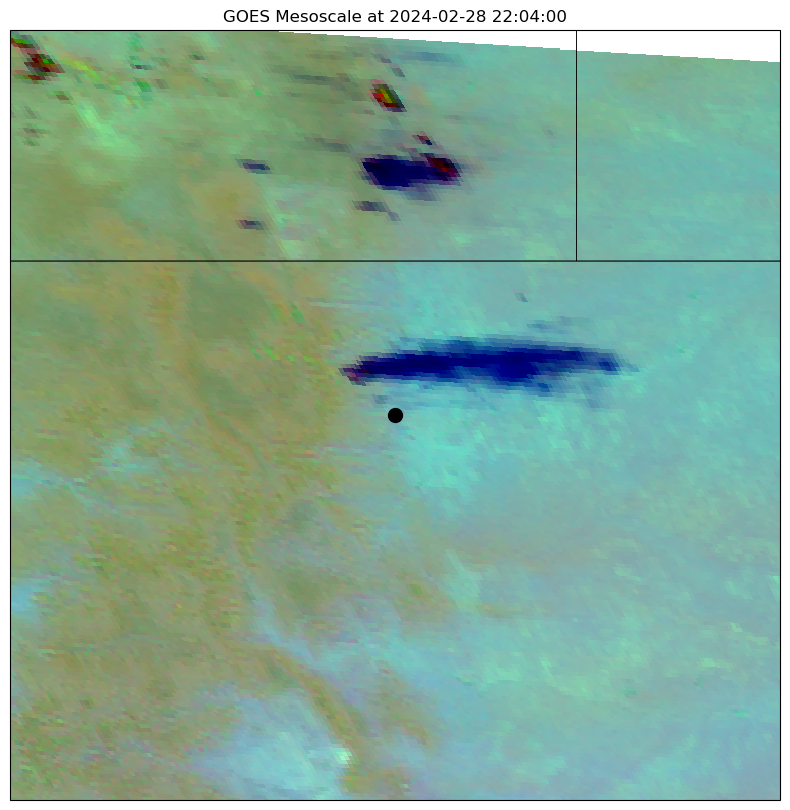

In [26]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pycontrails.datalib import goes

goes_handler = goes.GOES(goes.GOESRegion.M2)


# Get GOES image and transform info
offset_min = 1
ts = image_df.timestamp.iloc[0] + pd.Timedelta(offset_min, "minutes")
tstr = ts.strftime('%Y-%m-%d %H:%M:00')
da = goes_handler.get(tstr)
rgb, src_crs, src_extent = goes.extract_goes_visualization(da, color_scheme="ash")

# Plot GOES Mesoscale image, with point at lat/lon of image location
image_lat = image_df.img_lat.iloc[0]
image_lon = image_df.img_lon.iloc[0]

fig = plt.figure(figsize=(10, 10))
dst_crs = ccrs.PlateCarree()
ax = fig.add_subplot(projection=dst_crs, extent=(image_lon-2.5, image_lon+2.5, image_lat-2.5, image_lat+2.5))

ax.coastlines(resolution="50m", color="black", linewidth=0.5)
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=0.5)

ax.imshow(rgb, extent=src_extent, transform=src_crs, origin="upper", interpolation="none")
ax.scatter(image_lon, image_lat, c='k', s=100)

plt.title(f'GOES Mesoscale at {tstr}')
plt.show()